#Regresión No lineal Robusta

[ 2.58268056e-11 -2.56020715e+00 -6.38793067e+03]


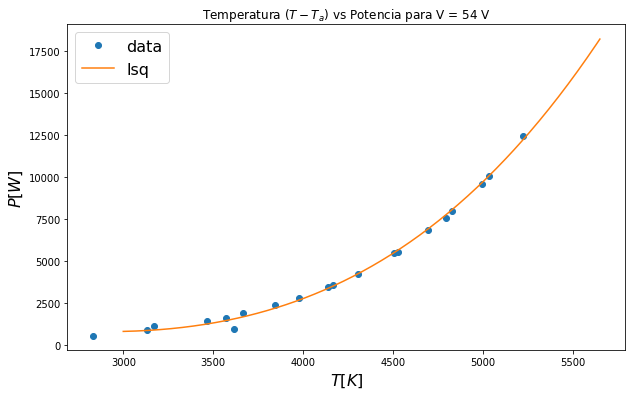

In [7]:
import numpy as np
import pandas
import xlrd


%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16

df = pandas.read_excel('usarpy4.xlsx')


  
def generate_func(T,A,B,C):
  y = A * np.power(T,4) +B*np.power(T,1)-C
  return y
  
  
A = 1
B = 1
C = 1
a = 4
b = 1
x_true = np.array([A, B, C])

noise = 0.1

T_min = 3000
T_max = 5650

t_train = df['Temperatura'].values
y_train = df['Potencia'].values

def fun(x, T, y):
    return x[0] * np.power(T,4) +x[1]*np.power(T,1)-x[2]-y
  
  
x0 = np.array([0.5,0.5,0.5])

from scipy.optimize import least_squares

res_lsq = least_squares(fun, x0, args=(t_train, y_train))

res_robust = least_squares(fun, x0, loss='soft_l1', f_scale=0.1, args=(t_train, y_train))


t_test = np.linspace(T_min, T_max, 300)

y_lsq = generate_func(t_test,*res_lsq.x)
y_robust = generate_func(t_test,*res_robust.x)

yfit=generate_func(t_train,*res_lsq.x)

res=yfit-y_train

plt.plot(t_train, y_train, 'o', label='data')
plt.plot(t_test, y_lsq, label='lsq')

plt.xlabel('$T [K]$')
plt.ylabel('$P [W]$')
plt.legend()
plt.title('Temperatura $(T - T_{a})$ vs Potencia para V = 54 V')

print(res_lsq.x)

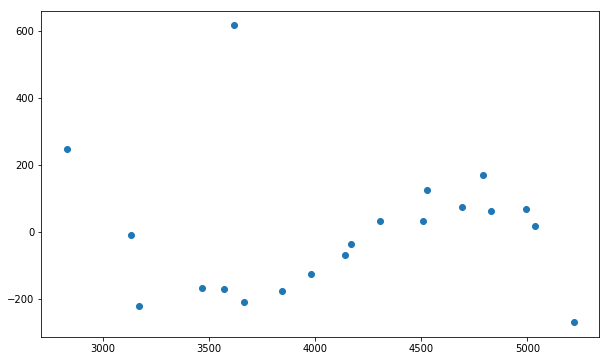

In [8]:
plt.plot(t_train, res,'o')